# Análisis (base de datos de bloggers)

Este notebook contiene un análisis a la base de datos proporcionada en [https://www.kaggle.com/rtatman/blog-authorship-corpus](https://www.google.com). La base de datos tiene alrededor de 600000 filas y cuenta con información sobre la persona que escribió cada blogger.

En este notebook se encuentran los algoritmos usados para analizar los datos y resultados para segmentar la audiencia utilizando como **input** la **edad** de los bloggers, los **temas** sobre los que escribieron y la **época del año** en la que lo hicieron.

**Si su interés es únicamente los resultados, basta con revisar las visualizaciones gráficas de los datos y los comentarios que las acompañan de cada una de las 3 secciones del notebook.** 

* En la **primera sección** se encuentran visualizaciones útiles para entender cualitativamente los datos proporcionados. 
* En la **segunda sección** hay un análisis de **PCA** y posteriormente **k-means** para segmentar responder al a inquietud de **¿Qué temas suelen escribir bloggers en determinados grupos de edaded?**. 
* En la **tercera sección** hay un análisis de **PCA** y posteriormente **k-means** para segmentar responder al a inquietud de **¿Qué temas suelen escribir bloggers en determinadas épocas del año?**

# 1. Vusalización de los datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from IPython.html.widgets import *

/home/dr-mthr/.local/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
data = pd.read_csv('blogtext.csv')#, nrows=100000)
data.date = pd.to_datetime(data.date,errors="coerce",infer_datetime_format=True)

In [3]:
data['date'] = pd.to_datetime(data.date)

In [4]:
data['age_int'] = pd.qcut(data['age'],3,precision=0,)

In [5]:
data.head()

,id,gender,age,topic,sign,date,text,age_int
0,2059027,male,15,Student,Leo,2004-05-14,"Info has been found (+/- 100 pages,...","(12.0, 17.0]"
1,2059027,male,15,Student,Leo,2004-05-13,These are the team members: Drewe...,"(12.0, 17.0]"
2,2059027,male,15,Student,Leo,2004-05-12,In het kader van kernfusie op aarde...,"(12.0, 17.0]"
3,2059027,male,15,Student,Leo,2004-05-12,testing!!! testing!!!,"(12.0, 17.0]"
4,3581210,male,33,InvestmentBanking,Aquarius,2004-06-11,Thanks to Yahoo!'s Toolbar I can ...,"(25.0, 48.0]"


## 1.1 Número de blogs escritos por tema

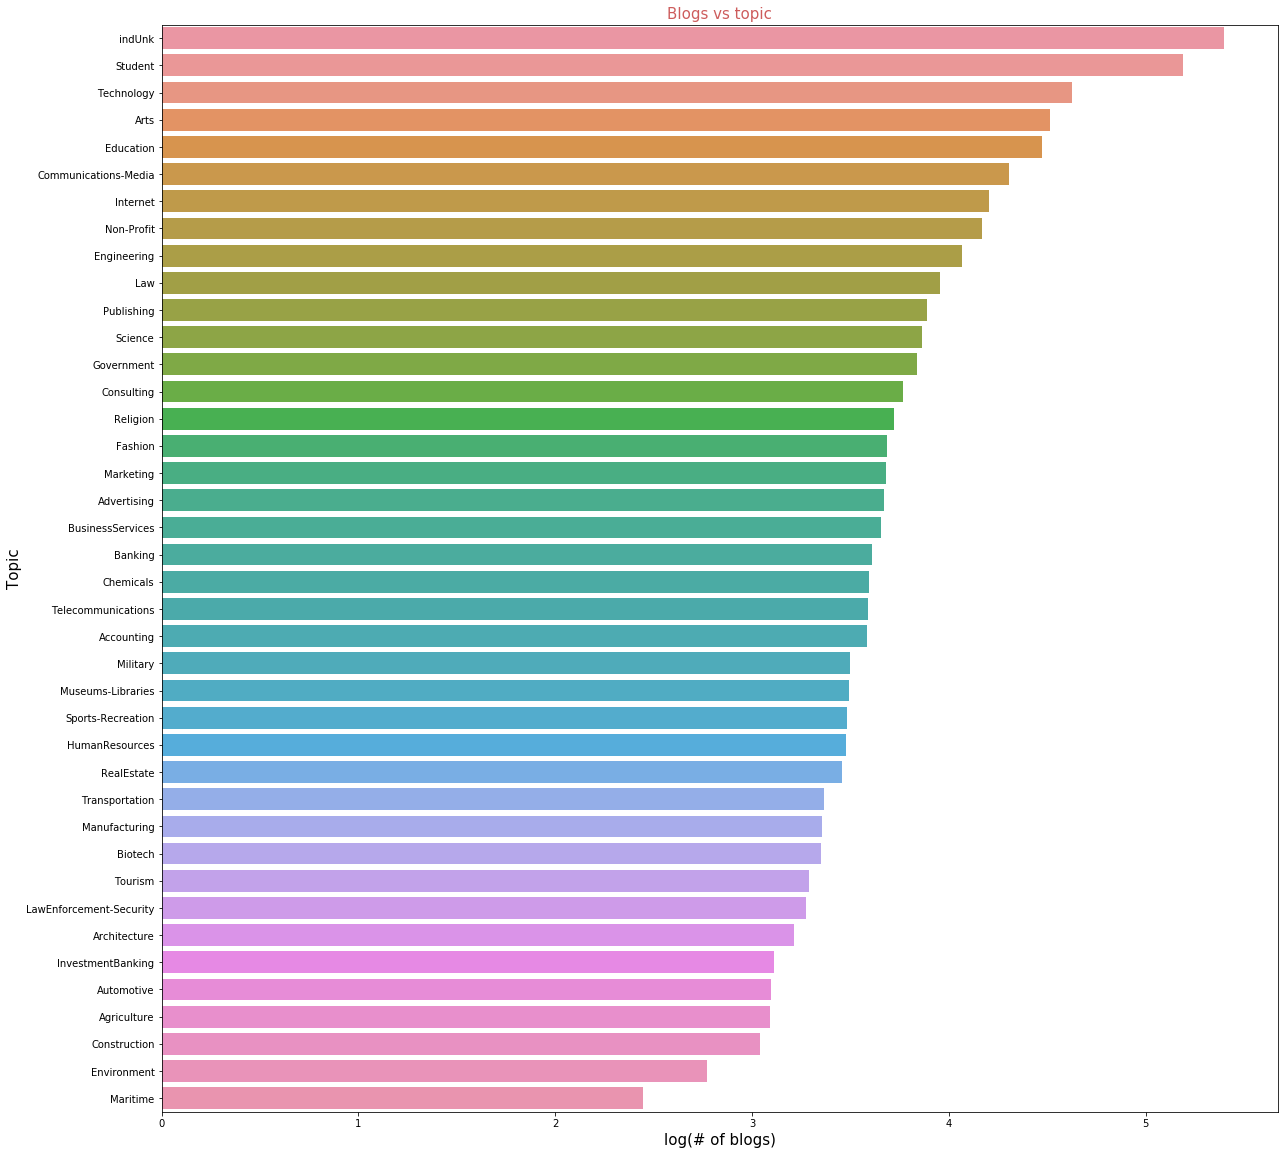

In [6]:
set1 = data.topic.value_counts()
x = set1.keys()
y = np.array(set1)

plt.figure(figsize=(20,20))
sns.barplot(np.log10(y),x)
plt.xlabel("log(# of blogs)",fontsize=15)
plt.ylabel("Topic",fontsize=15)
plt.title("Blogs vs topic",fontsize=15,color='indianred')
plt.show()

Se ha graficado el tema del blog con respecto al $\text{log}_{10}(\text{# de blogs})$ ya que los números se encontraban entre un gran rango. 

## 1.2 Temas vs edades

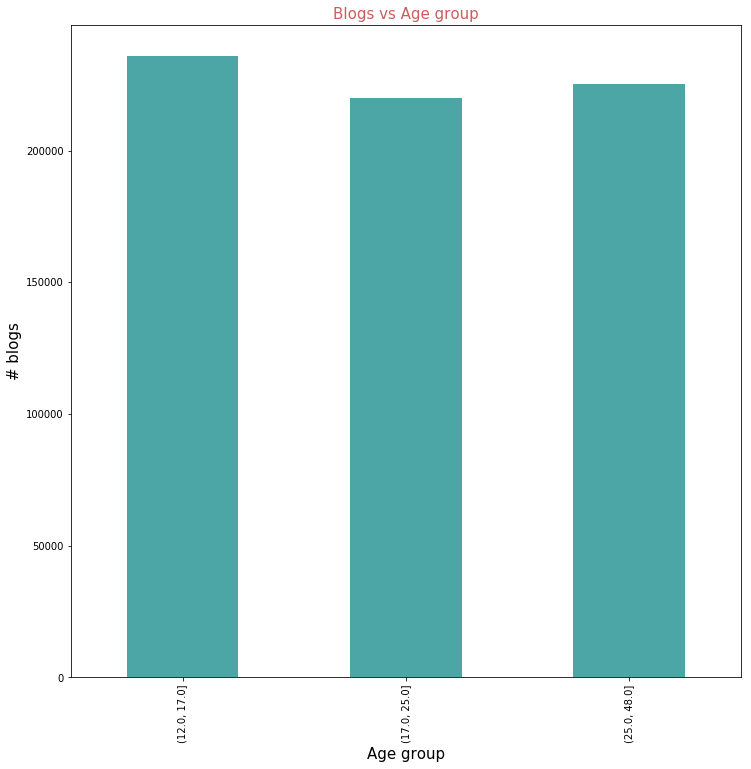

In [7]:
plt.figure(figsize=(12,12))
data.age_int.value_counts(sort=False).plot(kind='bar',alpha=0.7,color='teal')
plt.xlabel('Age group',fontsize=15)
plt.ylabel('# blogs',fontsize=15)
plt.title('Blogs vs Age group',fontsize=15,color='indianred')
plt.show()

Se ha dividido las edades en tres grupos. Los que se encuentran en el eje x de la figura anterios (medido en años).

En general escriben más personas jóvenes que adultas, lo que es de esperarse ya que el acceso a internet está dominado por personas más jóvenes pero la diferencia en esta base de datos particular no es mucha.

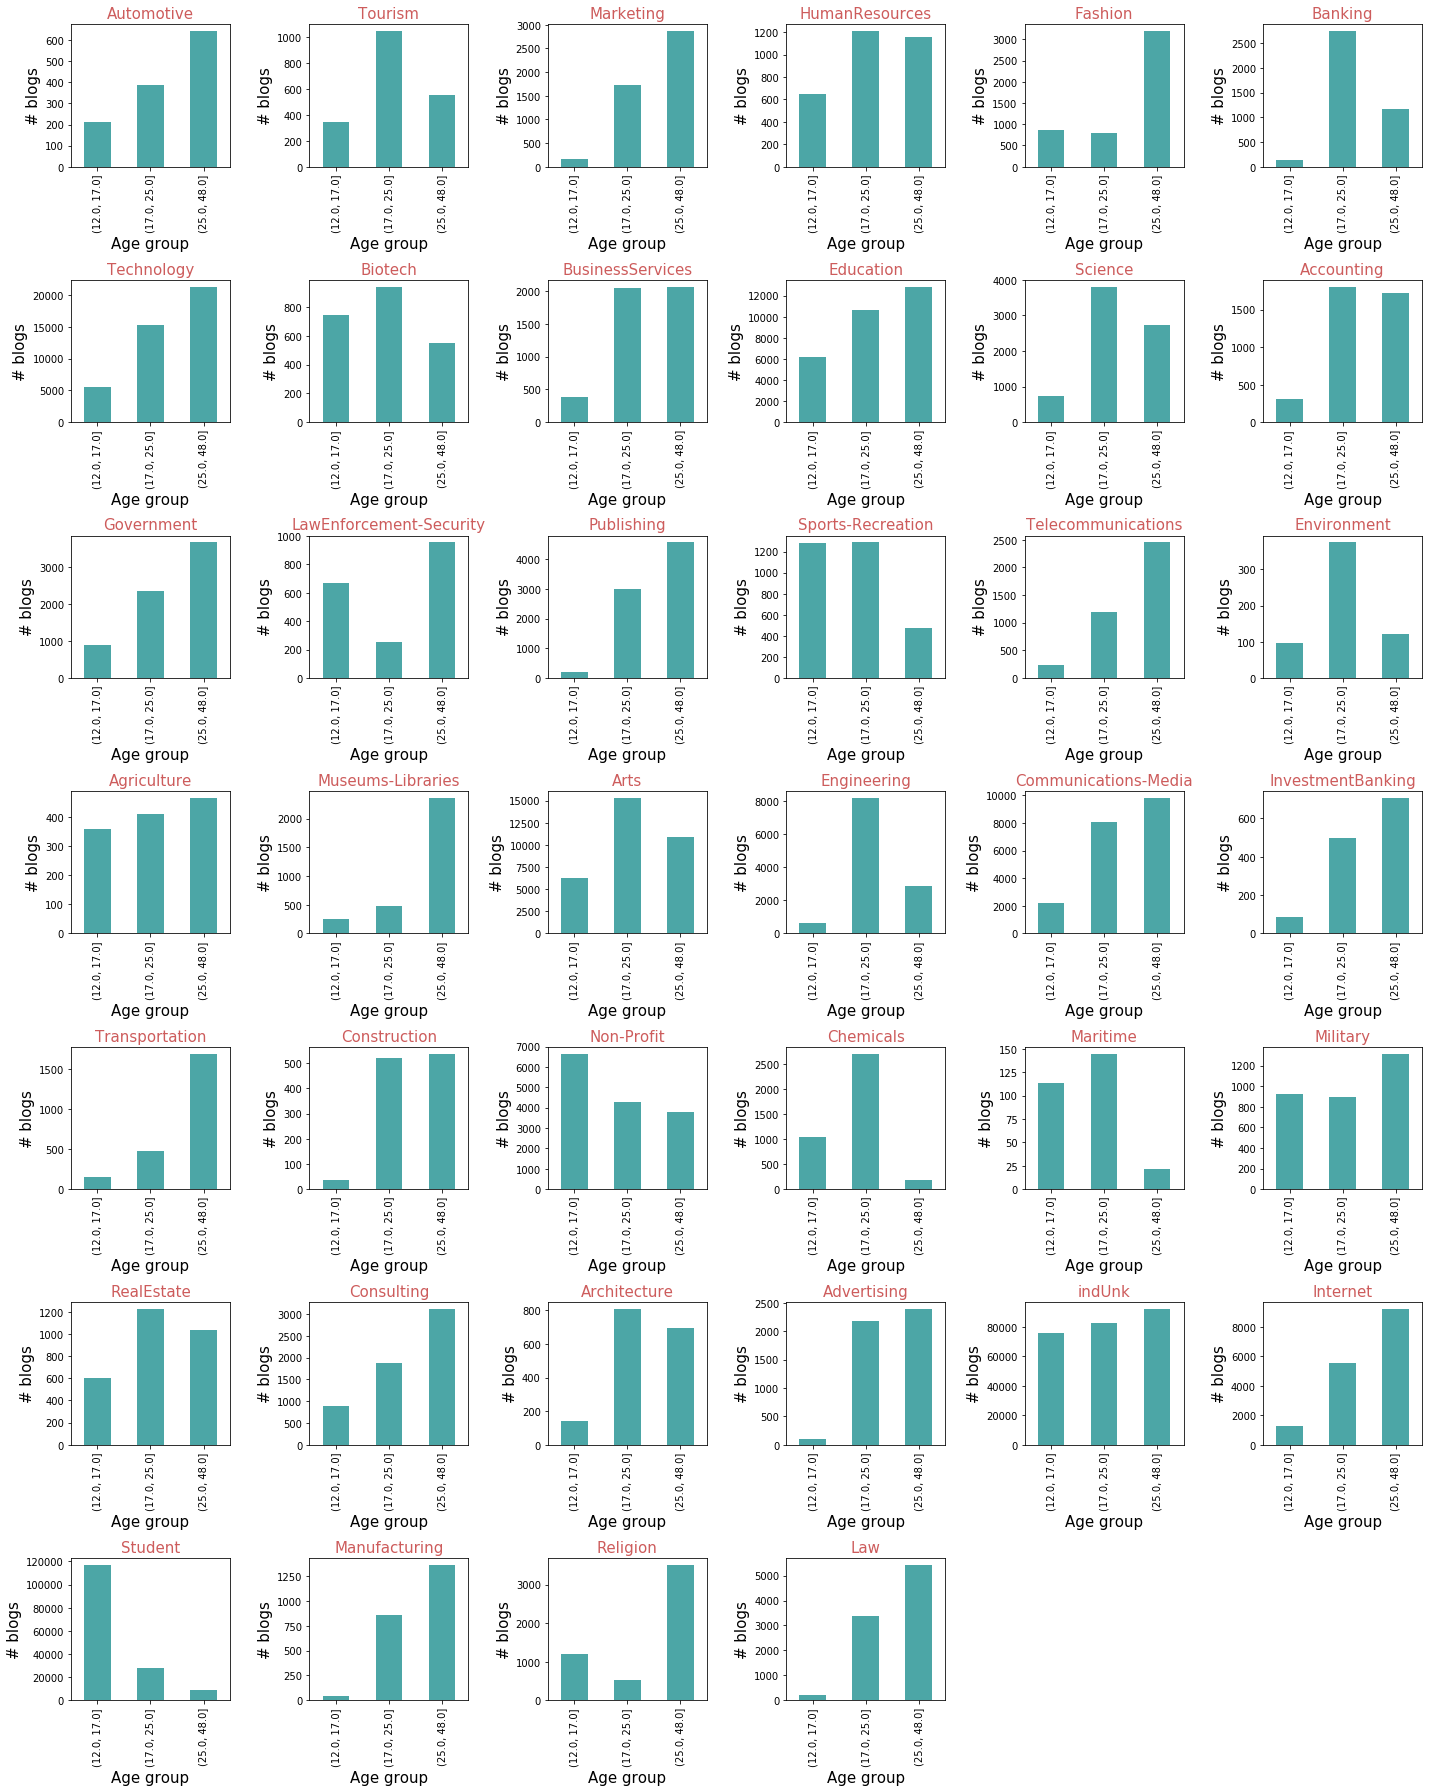

In [8]:
plt.figure(figsize=(20,25))
k = 1
for topic in set(data['topic']):
    data_topic = data[data['topic'] == topic]
    plt.subplot(7,6,k)
    data_topic.age_int.value_counts(sort=False).plot(kind='bar',alpha=0.7,color='teal')
    plt.xlabel('Age group',fontsize=15)
    plt.ylabel('# blogs',fontsize=15)
    plt.title(topic,fontsize=15,color='indianred')
    plt.tight_layout()
    k += 1
plt.show()

La gráfica anterior muestra el número de personas que escribieron blos sobre cada tema separado por el grupo de edades menocionado anteriormente. Por ejemplo, como es de esperarse se observa que sobre **Sports-Recreation** escriben personas **más jóvenes** pero **Fashion** es un tema que le gusta discutir más a los **mayores**.

## 1.3 Temas vs sexo (lo que aparece como "gender" en los datos)

El interés en esta sección es comparar el número de blogs escritos por usuarios "female" y usuarios "male" en los diferentes temas.

In [9]:
topic_list=set(data.topic)

In [10]:
def plthist_gender1(topic):
    data_topic = data[data['topic'] == topic]
    gen_cond = data_topic['gender'] == 'female'
    plt.figure(figsize=(12,12))
    data_topic[gen_cond].age_int.value_counts(sort=False).plot(kind='bar',alpha=0.5,color='turquoise',label='female')
    (-data_topic[~gen_cond].age_int.value_counts(sort=False)).plot(kind='bar',alpha=0.5,color='orchid',label='male')
    plt.axhline(0,color='black',linestyle='--',linewidth=1.0)
    plt.xlabel('Age group',fontsize=15)
    plt.ylabel('# blogs',fontsize=15)
    plt.title(topic,fontsize=15,color='indianred')
    plt.show()

interact(plthist_gender1, topic=topic_list)

interactive(children=(Dropdown(description='topic', options=('Automotive', 'Tourism', 'Marketing', 'HumanResou…

<function __main__.plthist_gender1(topic)>

En la gráfica anterior se puede apreciar el número de blogs escrito por cada tema para bloggers identificados como **female** -> {cian, hacia arriba} o **male** -> {magenta, hacia abajo}, de nuevo separados por los rangos de edad mencionados anteriormente. 

La siguiente gráfica muestra la diferencia entre estas dos cantidades para entender qué temas son más discutidos por usuarios **male** o usuarios **female**.

**LA SIGUIENTE GRÁFICA Y LA ANTERIOR TIENEN UN COMPONENTE INTERACTIVO QUE PERMITE VISUALIZAR CADA TEMA DEL BLOG POR SEPARADO (se puede cambiar el tema con la pestaña arriba de cada gráfica)**

In [11]:
def plthist_gender2(topic):
    data_topic = data[data['topic'] == topic]
    gen_cond = data_topic['gender'] == 'female'
    a = data_topic[gen_cond].age_int.value_counts(sort=False)
    b = data_topic[~gen_cond].age_int.value_counts(sort=False)
    plt.figure(figsize=(12,12))
    (a-b).plot(kind='bar',alpha=0.5,color='teal')
    plt.axhline(0,color='black',linestyle='--',linewidth=1.0)
    plt.xlabel('Age group',fontsize=15)
    plt.ylabel('# blogs',fontsize=15)
    plt.title(topic,fontsize=15,color='indianred')
    plt.show()

interact(plthist_gender2, topic=topic_list)

interactive(children=(Dropdown(description='topic', options=('Automotive', 'Tourism', 'Marketing', 'HumanResou…

<function __main__.plthist_gender2(topic)>

Se puede observar que hay temas dominados por usuarios "male" como lo son **Engineering**, **InvestmenBanking** y **Science**, otros dominados por usuarios "female" como **Student**, **Musems-Libraries**, **Architecture** y **Accounting** y otros que dependen de la edad como **Arts**, **Education** y **Religion**.

Cualitativamente se observa que hay más temas en los que los usuarios **male** escriben más que los usuarios **female**. Basados en que el número de usuarios **female** es del mismo orden que los usuarios **male**, podría decirse entonces que en los temas dominados por **female** la diferencia es más pronunciada, es decir, los **male** escriben más sobre distintos temas que los bloggers **female**.

## 1.4 Análisis temporal

El interés es encontrar patrones en el número de blogs y los meses o días en los que se han escrito para cada año. Lo primero es eliminar los blogs queno tienen la fecha en el formato adecuado. El nuevo DataFrame se llama "new_data".

In [12]:
data['weekday'] = np.int_(data['date'].dt.weekday)
data['year'] = np.int_(data['date'].dt.year)
data['month'] = np.int_(data['date'].dt.month)
data['day'] = np.int_(data['date'].dt.day)
data = data[data.topic != 'indUnk'] #Elimina blogs con tema desconocido
new_data = data[data.year != -9223372036854775808] #Elimina filas donde la fecha no es compatible con el formato
new_data['ni'] = range(len(new_data)) #orders the list
new_data = new_data.set_index('ni')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [13]:
new_data.year.value_counts()

2004    348017
2003     61431
2002     11715
2001      2820
2000       470
1999        59
2006        21
2005         6
Name: year, dtype: int64

In [14]:
new_data.head()

,id,gender,age,topic,sign,date,text,age_int,weekday,year,month,day
ni,,,,,,,,,,,,
0,2059027,male,15,Student,Leo,2004-05-14,"Info has been found (+/- 100 pages,...","(12.0, 17.0]",4,2004,5,14
1,2059027,male,15,Student,Leo,2004-05-13,These are the team members: Drewe...,"(12.0, 17.0]",3,2004,5,13
2,2059027,male,15,Student,Leo,2004-05-12,In het kader van kernfusie op aarde...,"(12.0, 17.0]",2,2004,5,12
3,2059027,male,15,Student,Leo,2004-05-12,testing!!! testing!!!,"(12.0, 17.0]",2,2004,5,12
4,3581210,male,33,InvestmentBanking,Aquarius,2004-06-11,Thanks to Yahoo!'s Toolbar I can ...,"(25.0, 48.0]",4,2004,6,11


### 1.4.1 Meses del año

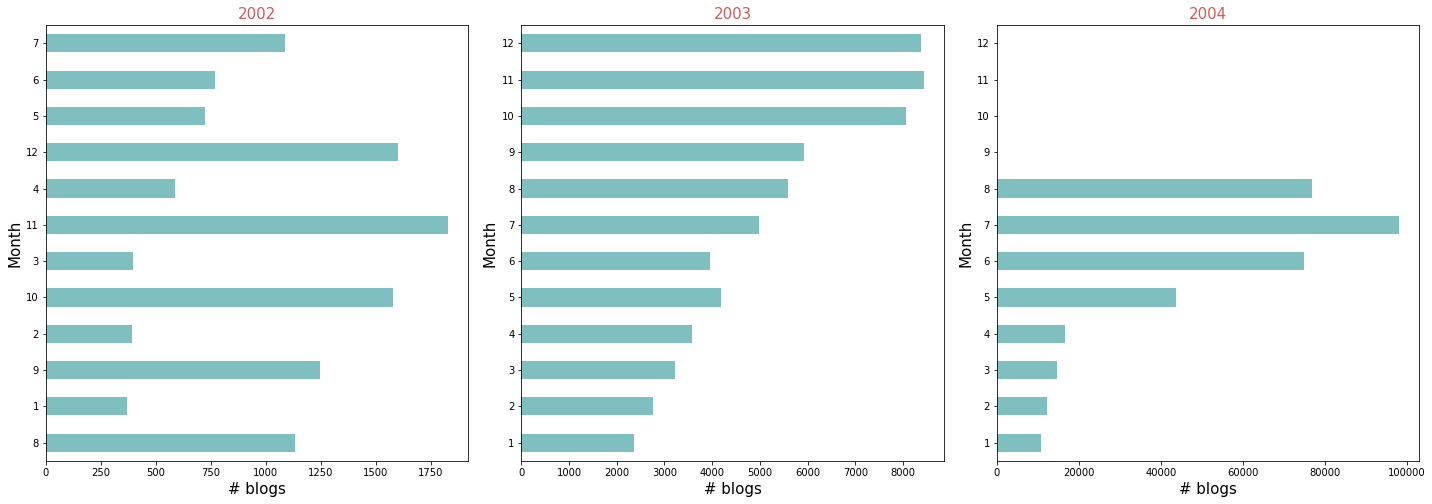

In [15]:
plt.figure(figsize=(20,20))
k = 1
good_years = [2002,2003,2004] #Estos son los años en los que parece haber un buen número de blog para hacer estadística
for year in good_years:
    data_year = new_data[new_data.year == year]
    data_year = data_year.sort_values('month')
    plt.subplot(3,3,k)
    data_year.month.value_counts(sort=False).plot(kind='barh',alpha=0.5,color='teal')
    plt.ylabel('Month',fontsize=15)
    plt.xlabel('# blogs',fontsize=15)
    plt.title(year,fontsize=15,color='indianred')
    k += 1
    plt.tight_layout()
plt.show()

Se puede observar que las personas tienden a escribir más blogs en los meses finales del año. Claramente se observa un crecimiento del # de blogs conforme los meses aumentan.

### 1.4.2 Días de la semana

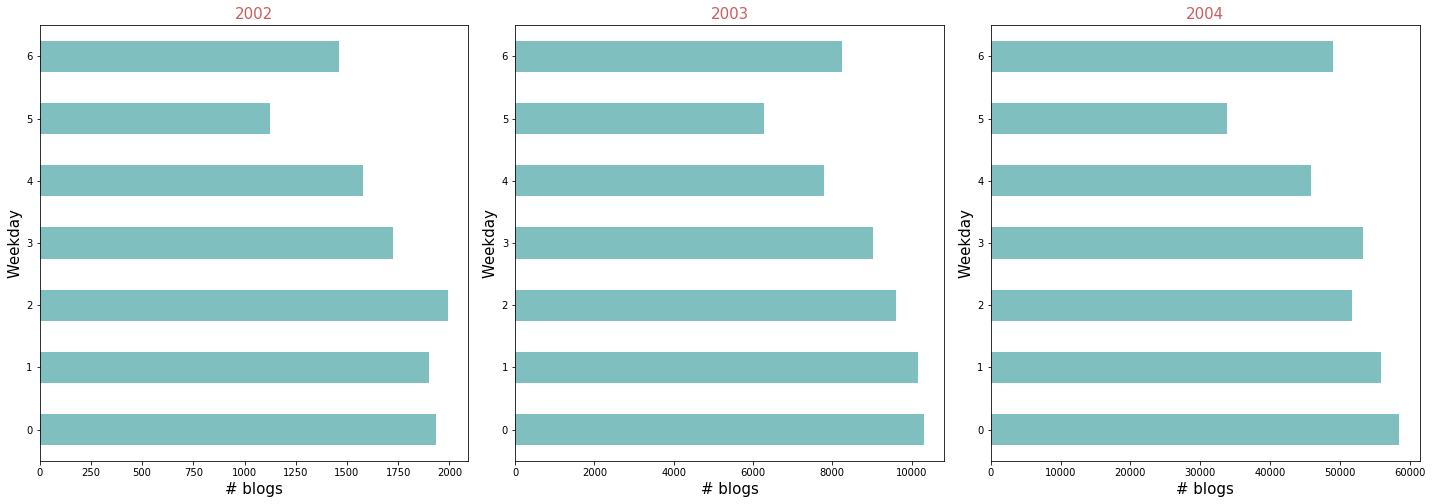

In [17]:
plt.figure(figsize=(20,20))
k = 1
for year in good_years:
    data_year = new_data[new_data.year == year]
    plt.subplot(3,3,k)
    data_year.weekday.value_counts(sort=False).plot(kind='barh',alpha=0.5,color='teal')
    plt.ylabel('Weekday',fontsize=15)
    plt.xlabel('# blogs',fontsize=15)
    plt.title(year,fontsize=15,color='indianred')
    plt.tight_layout()
    k += 1
plt.show()

A partir de la gráfica anterior se puede decir que los días en los que menos se escribieron blogs, para los 3 años en cuestión, son el día 5 y 6 que corresponden al sábado y domingo respectivamente. Es posible que se deba a que en estos días las personas salen a recrearse y es más probable que naveguen en internet en los días entre semana.

### 1.4.3 Días del mes

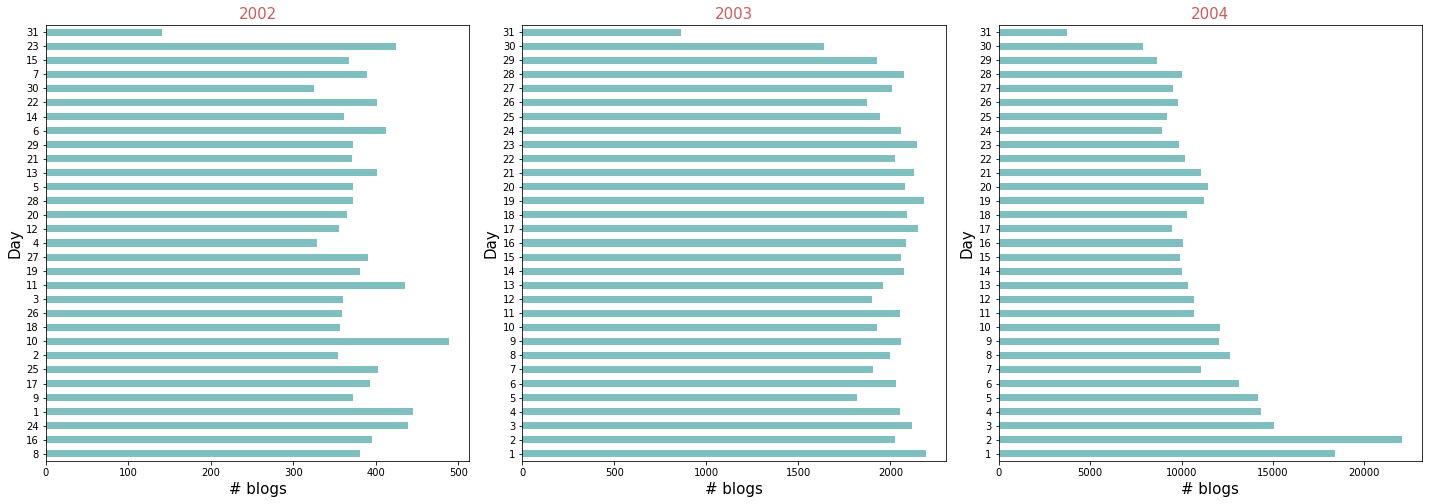

In [18]:
plt.figure(figsize=(20,20))
k = 1
for year in good_years:
    data_year = new_data[new_data.year == year]
    plt.subplot(3,3,k)
    data_year.day.value_counts(sort=False).plot(kind='barh',alpha=0.5,color='teal')
    plt.ylabel('Day',fontsize=15)
    plt.xlabel('# blogs',fontsize=15)
    plt.title(year,fontsize=15,color='indianred')
    plt.tight_layout()
    k += 1
plt.show()

Con respecto al día del mes no se puede decir mucho pues el perfil no parece tener picos agudos.

Puede concluirse que no se encuentra un patrón que muestre que los bloggers escriben más en ciertos días de la semana o del mes. Aunque se observa que sí hay más blogs escritos en los últimos meses del año.

# 2. Edad y temas (PCA y k-means)

En esta sección hacemos un Principal Component Analysis (PCA) para disminuir la dimensionalidad del problema e identificar aporoximadamente el número de clusters para el algoritmo de k-means.

Lo primero es modificar las variables **topic** y **age_int** que son **categorical data** para que sean variables numéricas con las que se pueda hacer un PCA.

In [19]:
dummies = pd.get_dummies(new_data['topic'], prefix='(t)')
new_data = pd.concat([new_data, dummies], axis=1)
new_data = new_data.drop('topic', axis=1)
dummies2 = pd.get_dummies(new_data['age_int'], prefix='(a)')
new_data = pd.concat([new_data, dummies2], axis=1)

In [20]:
x_features = new_data.columns[11:]

In [21]:
x_features

Index(['(t)_Accounting', '(t)_Advertising', '(t)_Agriculture',
       '(t)_Architecture', '(t)_Arts', '(t)_Automotive', '(t)_Banking',
       '(t)_Biotech', '(t)_BusinessServices', '(t)_Chemicals',
       '(t)_Communications-Media', '(t)_Construction', '(t)_Consulting',
       '(t)_Education', '(t)_Engineering', '(t)_Environment', '(t)_Fashion',
       '(t)_Government', '(t)_HumanResources', '(t)_Internet',
       '(t)_InvestmentBanking', '(t)_Law', '(t)_LawEnforcement-Security',
       '(t)_Manufacturing', '(t)_Maritime', '(t)_Marketing', '(t)_Military',
       '(t)_Museums-Libraries', '(t)_Non-Profit', '(t)_Publishing',
       '(t)_RealEstate', '(t)_Religion', '(t)_Science',
       '(t)_Sports-Recreation', '(t)_Student', '(t)_Technology',
       '(t)_Telecommunications', '(t)_Tourism', '(t)_Transportation',
       '(a)_(12.0, 17.0]', '(a)_(17.0, 25.0]', '(a)_(25.0, 48.0]'],
      dtype='object')

(t) representa una variable de tipo "topic" y (a) una variable de tipo "age" o rango de edades.

## 2.1 PCA

In [22]:
X = np.array(new_data[x_features])
pca = PCA()
pca.fit(X)
comp = pca.components_
trans = pca.fit_transform(X)

In [23]:
evr = pca.explained_variance_ratio_
cevr = []
for i in range(1,len(evr)+1):
    cevr.append(np.sum(evr[:i]))
pca_list = np.arange(len(evr))

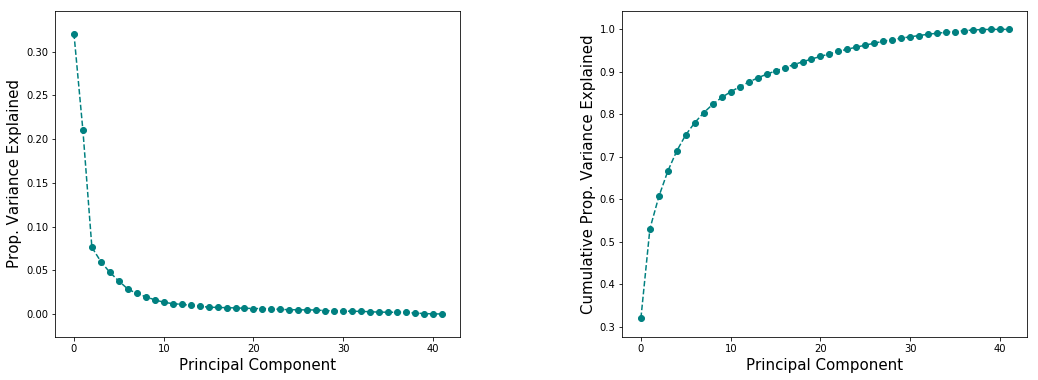

In [24]:
fig = plt.figure(figsize = (15,6))
fig.subplots_adjust(wspace = 0.4,left  = 0.2, right = 1.1)
ax = fig.add_subplot(1,2,1) 
bx = fig.add_subplot(1,2,2) 
ax.scatter(pca_list,evr,color='teal')
ax.plot(pca_list,evr,linestyle='--',color='teal')
bx.scatter(pca_list,cevr,color='teal')
bx.plot(pca_list,cevr,linestyle='--',color='teal')
ax.set_xlabel('Principal Component',fontsize = 15)
ax.set_ylabel('Prop. Variance Explained',fontsize = 15)
bx.set_xlabel('Principal Component',fontsize = 15)
bx.set_ylabel('Cumulative Prop. Variance Explained',fontsize = 15)
plt.show()

La gráfica de la izquierda muestra los autovalores de las componente principales, que a su vez representan cuánto porcentaje de la varianza de los datos se puede explicar con su respectiva componente principal. 

La gráfica de la derecha muestra entonces la acumulada de la gráfica de la izquierda y nos dice que basta con pocas componentes principales (de 3 a 5) para explicar el 70-80% de la varianza total de los datos.

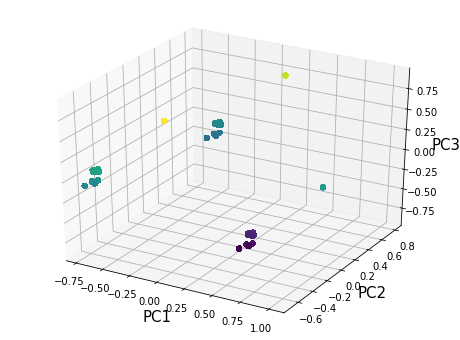

In [25]:
from mpl_toolkits import mplot3d

plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
xdata = trans[:,0]
ydata = trans[:,1]
zdata = trans[:,2]
ax.scatter3D(xdata, ydata, zdata, c=zdata, alpha=0.5)
ax.set_xlabel('PC1',fontsize=15)
ax.set_ylabel('PC2',fontsize=15)
ax.set_zlabel('PC3',fontsize=15)
plt.show()

Proyectando todos los datos al espacio 3D conformado por las primeras 3 componentes principales obtenemos que los datos se encuentran acumulados en ciertas regiones, lo que nos lleva a pensar que podemos utilizar algún algoritmo de clusterin para entender mejor los datos. 

A continuación se encuentra la misma información graficada para cada par de componentes principales (las 3 primeras).

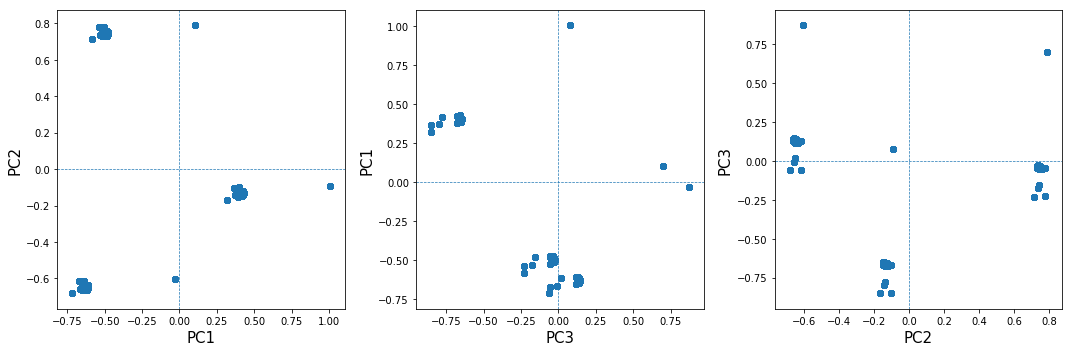

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)

plt.scatter(trans[:,0],trans[:,1], alpha=0.35)
plt.xlabel('PC1',fontsize=15)
plt.ylabel('PC2',fontsize=15)
plt.axhline(0,linestyle='--',linewidth=0.7)
plt.axvline(0,linestyle='--',linewidth=0.7)

plt.subplot(1,3,3)
plt.scatter(trans[:,1],trans[:,2], alpha=0.35)
plt.xlabel('PC2',fontsize=15)
plt.ylabel('PC3',fontsize=15)
plt.axhline(0,linestyle='--',linewidth=0.7)
plt.axvline(0,linestyle='--',linewidth=0.7)

plt.subplot(1,3,2)
plt.scatter(trans[:,2],trans[:,0], alpha=0.35)
plt.xlabel('PC3',fontsize=15)
plt.ylabel('PC1',fontsize=15)
plt.axhline(0,linestyle='--',linewidth=0.7)
plt.axvline(0,linestyle='--',linewidth=0.7)

plt.tight_layout()
plt.show()

## 2.2 k-means

In [27]:
nclust = 3
kmeans = KMeans(n_clusters=nclust, random_state=10)
cluster_labels = kmeans.fit_predict(new_data[x_features])
new_data['clusters'] = cluster_labels

Se usa un algoritmo de k-means para separar los datos, se usan 3 clusters pues se puede comprobar que usando más de 3 el resultado siempre es que los primeros 3 clusters tienen información útil y el resto no es fácilmente identificable. Volveremos a esto enseguida.

In [28]:
def plthist(n_cluster):
    new_data[new_data.clusters == n_cluster][x_features].sum().plot.bar(fig = plt.figure(figsize = (20,15)))
    plt.show()

interact(plthist, n_cluster=(0,nclust-1,1))

interactive(children=(IntSlider(value=1, description='n_cluster', max=2), Output()), _dom_classes=('widget-int…

<function __main__.plthist(n_cluster)>

La gráfica anterior muestra que cada cluster siempre tiene asociado un **único grupo de edad** determinado. Es posible modificar manualmente el número del cluster para ver con qué **temas** está más relacionado cada **grupo de edad**.

A continuación se presentan los temas con los que más se relaciona cada grupo de edad.

/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


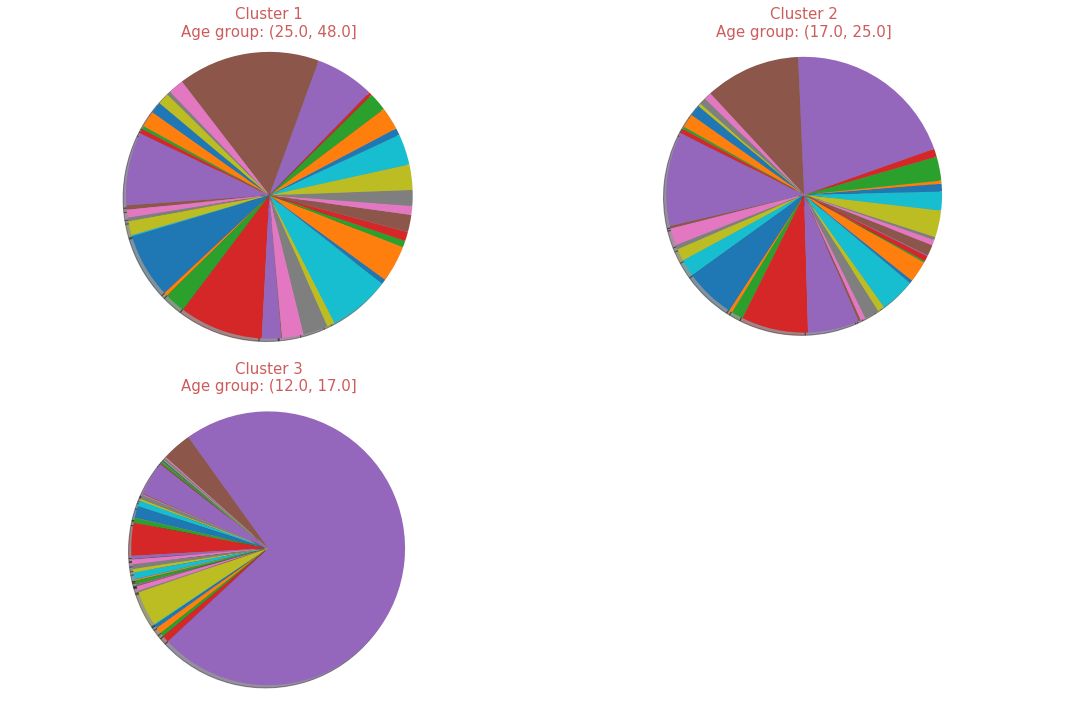

In [29]:
plt.figure(figsize=(15,10))
k = 1
for clust in range(nclust):
    plt.subplot(2,2,k)
    
    #labels = 
    sizes = new_data[new_data.clusters == clust][x_features].sum().values[:-3]
    colors = new_data[new_data.clusters == clust][x_features].sum().values[:-3]
    #explode = (0.1, 0, 0, 0)  # explode 1st slice
 
    plt.pie(sizes, shadow=True, startangle=140)
 
    plt.axis('equal')
    plt.title('Cluster '+str(clust+1)+'\n'+'Age group: '
              +str(np.argmax(new_data[new_data.clusters == clust][x_features].sum()[-3:]))[4:]
             ,fontsize=15,color='indianred')
    
    plt.tight_layout()
    k += 1
plt.show()

Como se puede observar, cada **gurpo de edad** tiene ciertas preferencias sobre diferentes temas, representados por distintos colores en cada gráfico. Es claro que el grupo de personas más jóvenes tiene una preferencia bastante marcada mientras los otros dos parecen tener máa diversidad. Para aclarar el punto anterios graficamos, para cada grupo, las 4 primeras opciones de **temas**.

In [30]:
df1 = new_data[new_data.clusters == 0][x_features].sum()
df2 = new_data[new_data.clusters == 1][x_features].sum()
df3 = new_data[new_data.clusters == 2][x_features].sum()

/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)
/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)
/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argm

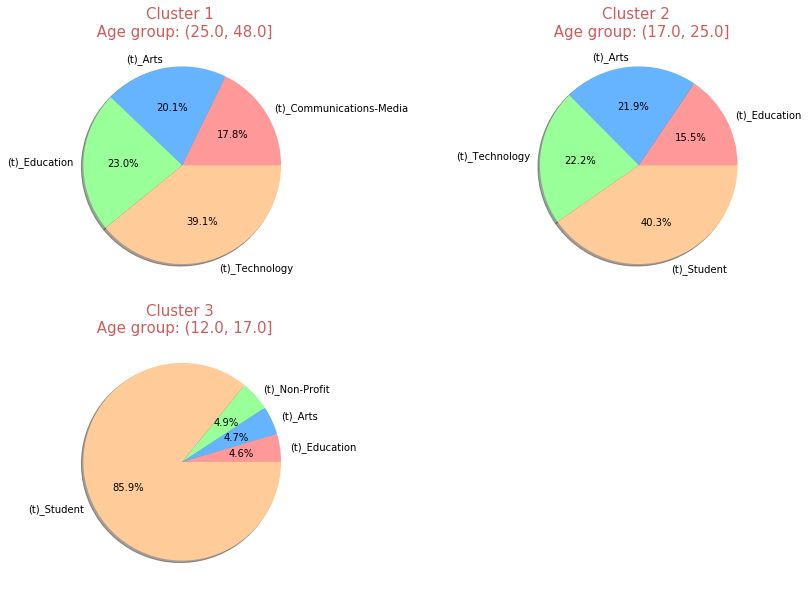

In [31]:
plt.figure(figsize=(15,10))
colors = colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

plt.subplot(2,2,1)
df1.sort_values()[-5:-1].plot(kind='pie',autopct='%1.1f%%',colors=colors,shadow=True)
plt.title('Cluster 1 \n Age group: '+str(np.argmax(df1))[4:],fontsize=15,color='indianred')
plt.ylabel("")

plt.subplot(2,2,2)
df2.sort_values()[-5:-1].plot(kind='pie',autopct='%1.1f%%',colors=colors,shadow=True)
plt.title('Cluster 2 \n Age group: '+str(np.argmax(df2))[4:],fontsize=15,color='indianred')
plt.ylabel("")

plt.subplot(2,2,3)
df3.sort_values()[-5:-1].plot(kind='pie',autopct='%1.1f%%',colors=colors,shadow=True)
plt.title('Cluster 3 \n Age group: '+str(np.argmax(df3))[4:],fontsize=15,color='indianred')
plt.ylabel("")

plt.show()

Como es de esperarse, el grupo de personas con edades entre 13-17 años escribe principalmente blogs asociados al tema **Student**. El segundo grupo (18-25 años) se interesa principalmente en temas como **Student**, **Education**, **Technology** y **Arts**. Por útlim, el grupo de personas con 26-48 años se interesan en **Technology**, **Education**, **Arts** y **Communications_Media**.

Teniendo esto en cuenta, es destacable que de acuerdo al **público objetivo** es conveniente, para posicionar marcas en blogs, estar al tanto de qué **temas** son los más visitados por cada audiencia. En este caso, basados en la edad de los usuarios es posible tener una mejor estrategia para ofrecer lo que las personas de cada **grupo de edades** consume en los blogs que más suelen leer y escribir.

# Temas y época del año (PCA y k-means)

Acá se hace el mismo análisis anterior para visualizar en qué época del año se escribe más sobre ciertos temas.

Lo primero es modificar la variable **month** que es **categorical data** para que sean variables numéricas con las que se pueda hacer un PCA.

In [32]:
dummies4 = pd.get_dummies(new_data['month'], prefix='(m)')
new_data = pd.concat([new_data, dummies4], axis=1)
new_data = new_data.drop('(a)_(12.0, 17.0]', axis=1)
new_data = new_data.drop('(a)_(17.0, 25.0]', axis=1)
new_data = new_data.drop('(a)_(25.0, 48.0]', axis=1)
new_data = new_data.drop('clusters', axis=1)

In [33]:
x_features = new_data.columns[11:]
[x_features]

[Index(['(t)_Accounting', '(t)_Advertising', '(t)_Agriculture',
        '(t)_Architecture', '(t)_Arts', '(t)_Automotive', '(t)_Banking',
        '(t)_Biotech', '(t)_BusinessServices', '(t)_Chemicals',
        '(t)_Communications-Media', '(t)_Construction', '(t)_Consulting',
        '(t)_Education', '(t)_Engineering', '(t)_Environment', '(t)_Fashion',
        '(t)_Government', '(t)_HumanResources', '(t)_Internet',
        '(t)_InvestmentBanking', '(t)_Law', '(t)_LawEnforcement-Security',
        '(t)_Manufacturing', '(t)_Maritime', '(t)_Marketing', '(t)_Military',
        '(t)_Museums-Libraries', '(t)_Non-Profit', '(t)_Publishing',
        '(t)_RealEstate', '(t)_Religion', '(t)_Science',
        '(t)_Sports-Recreation', '(t)_Student', '(t)_Technology',
        '(t)_Telecommunications', '(t)_Tourism', '(t)_Transportation', '(m)_1',
        '(m)_2', '(m)_3', '(m)_4', '(m)_5', '(m)_6', '(m)_7', '(m)_8', '(m)_9',
        '(m)_10', '(m)_11', '(m)_12'],
       dtype='object')]

## 3.1 PCA

In [34]:
X = np.array(new_data[x_features])
pca = PCA()
pca.fit(X)
comp = pca.components_
trans = pca.fit_transform(X)

In [35]:
evr = pca.explained_variance_ratio_
cevr = []
for i in range(1,len(evr)+1):
    cevr.append(np.sum(evr[:i]))
pca_list = np.arange(len(evr))

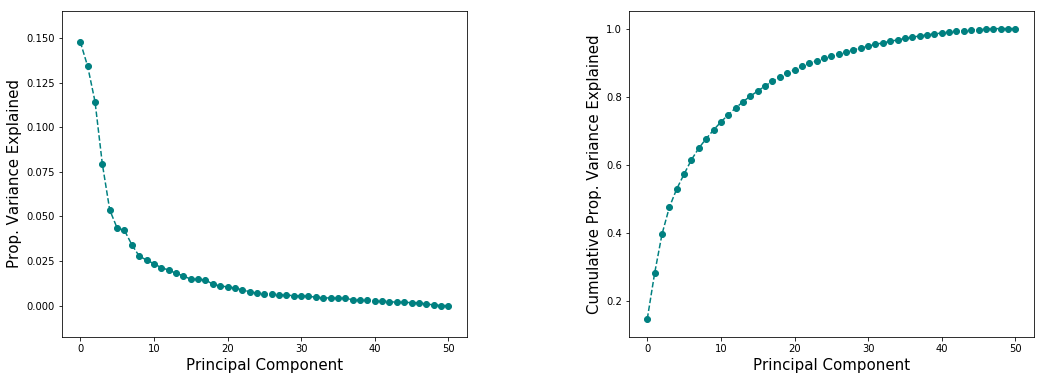

In [36]:
fig = plt.figure(figsize = (15,6))
fig.subplots_adjust(wspace = 0.4,left  = 0.2, right = 1.1)
ax = fig.add_subplot(1,2,1) 
bx = fig.add_subplot(1,2,2) 
ax.scatter(pca_list,evr,color='teal')
ax.plot(pca_list,evr,linestyle='--',color='teal')
bx.scatter(pca_list,cevr,color='teal')
bx.plot(pca_list,cevr,linestyle='--',color='teal')
ax.set_xlabel('Principal Component',fontsize = 15)
ax.set_ylabel('Prop. Variance Explained',fontsize = 15)
bx.set_xlabel('Principal Component',fontsize = 15)
bx.set_ylabel('Cumulative Prop. Variance Explained',fontsize = 15)
plt.show()

En este caso se obserga que los datos no se pueden explicar casi completamente con pocas componentes principales, como lo muestra la gráfica de la derecha. Sin embargo hacemos el mismo análisis que en el caso anterior para dividir los datos en ciertas categorías.

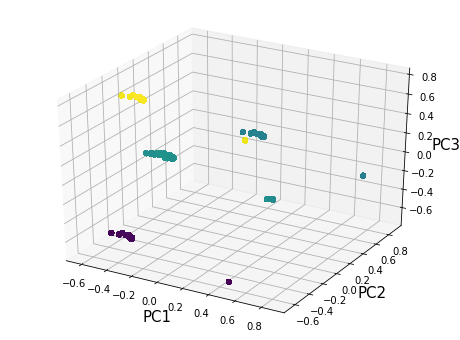

In [37]:
from mpl_toolkits import mplot3d

plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
xdata = trans[:,0]
ydata = trans[:,1]
zdata = trans[:,2]
ax.scatter3D(xdata, ydata, zdata, c=zdata, alpha=0.5)
ax.set_xlabel('PC1',fontsize=15)
ax.set_ylabel('PC2',fontsize=15)
ax.set_zlabel('PC3',fontsize=15)
plt.show()

Es posible ver que en este caso los datos también se ven *muy acumulados* en ciertas regiones

## 3.2 k-means

In [38]:
nclust = 10
kmeans = KMeans(n_clusters=nclust, random_state=10)
cluster_labels = kmeans.fit_predict(new_data[x_features])
new_data['clusters'] = cluster_labels

Se usa un algoritmo de k-means para separar los datos, se usan 10 clusters de los cuales se observa que algunos de ellos arrojan información útil y el resto no es fácilmente identificable. Volveremos a esto enseguida.

La siguiente gráfica cuenta con la herramienta interactiva para observar los diferentes clusters de datos generados con el algoritmo de k-means.

In [39]:
interact(plthist, n_cluster=(0,nclust-1,1))

interactive(children=(IntSlider(value=4, description='n_cluster', max=9), Output()), _dom_classes=('widget-int…

<function __main__.plthist(n_cluster)>

En la gráfica anterior se puede observar que los clusters 1, 2, 3, 4 y 8 proporcionan información de los temas más recurrentes en determinados meses del año. Debido a que estos son clusters que se pueden interpretar fácilmente a continuación se muestra de forma más sencilla los 4 temas más escritos correspondientes a los meses 3 (**Marzo**), 5 (**Mayo**), 6 (**Junio**), 7 (**Julio**) y 8 (**Agosto**).

In [42]:
good_clusters = [1,2,3,4,8]
df = []
for i in good_clusters:
    df.append(new_data[new_data.clusters == i][x_features].sum())

/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)
/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)
/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argm

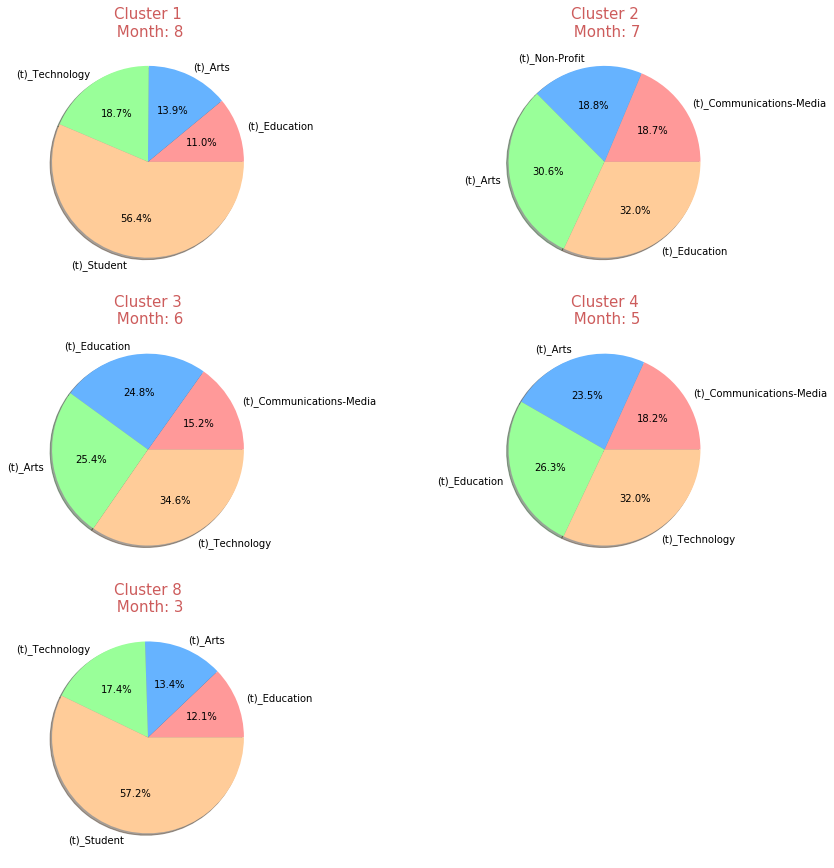

In [55]:
plt.figure(figsize=(15,15))
colors = colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
k = 1
for i in df:
    plt.subplot(3,2,k)
    i.sort_values()[-5:-1].plot(kind='pie',autopct='%1.1f%%',colors=colors,shadow=True)
    plt.title('Cluster '+str(good_clusters[k-1])+'\n Month: '+str(np.argmax(i))[4:],fontsize=15,color='indianred')
    plt.ylabel("")
    k += 1
plt.show()

Dado un cierto **público objetivo** es conveniente, para posicionar marcas en blogs, estar al tanto de qué **temas** se encuentran más activos en ciertas **épocas del año**.

En la gráfica anterior se muestran los 4 principales temas sobre los que se escribe en cada mes asociado a cada *cluster* de datos. Se puede observar que los temas que más aparecen en el año son: **Student**, **Technology**, **Education**, **Arts** y **Communications-Media** como lo revela la primer gráfica de este notebook. Sin embargo es posible ver que **Student** es un tema que se encuentra mucho más activo en los meses **Marzo** y **Agosto** que en los demás. 